In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
"""
Now, I need to check if I have any missing data. I could have missing data for a few of my categories.

"""

'\nNow, I need to check if I have any missing data. I could have missing data for a few of my categories.\n\n'

In [3]:
dataset = pd.read_csv('Household-V1_2_prelim.csv')

In [4]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [5]:
dataset

,SAMPN,RESTY,HHSIZ,HHLIC,INCOM_R,HHVEH_R
0,3000056,1,6,4,3,3
1,3000128,1,5,3,2,2
2,3000139,1,2,2,9,2
3,3000146,1,1,1,3,1
4,3000157,2,1,0,1,0
5,3000239,1,2,2,9,1
6,3000250,2,1,1,2,1
7,3000275,1,2,2,2,1
8,3000296,2,1,0,1,0
9,3000403,2,1,1,1,0


In [6]:
dataset.RESTY.unique()

array([1, 2, 3, 8, 9])

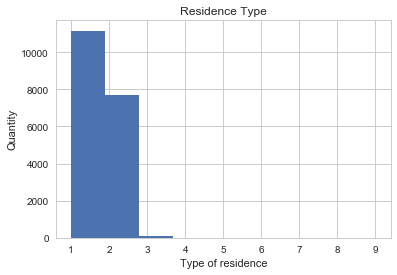

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dataset['RESTY'], bins = 9)
plt.title('Residence Type')
plt.xlabel('Type of residence')
plt.ylabel('Quantity')
plt.show()

In [8]:
dataset.RESTY.value_counts(dropna=False)

1    11157
2     7699
3       91
8       10
9        8
Name: RESTY, dtype: int64

In [33]:
dataset.HHSIZ.value_counts(dropna=False)

2     6709
1     5775
3     2990
4     2453
5      763
6      197
7       49
8       21
9        6
11       1
10       1
Name: HHSIZ, dtype: int64

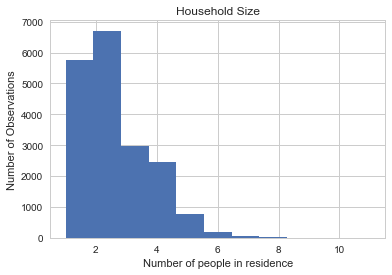

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dataset['HHSIZ'], bins = 11)
plt.title('Household Size')
plt.xlabel('Number of people in residence')
plt.ylabel('Number of Observations')
plt.show()

In [46]:
Auto_own_level_freq = dataset.HHVEH_R.value_counts()
print(Auto_own_level_freq)

2    6242
1    5852
0    3771
3    3100
Name: HHVEH_R, dtype: int64


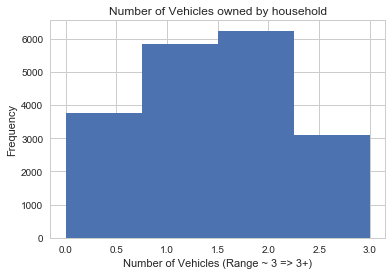

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dataset["HHVEH_R"], bins=4)
plt.title("Number of Vehicles owned by household")
plt.xlabel("Number of Vehicles (Range ~ 3 => 3+)")
plt.ylabel("Frequency")
plt.show()

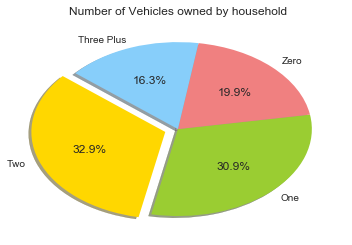

In [49]:
# 2, 1, 0, 3
labels = ['Two', 'One', 'Zero', 'Three Plus']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.pie(Auto_own_level_freq, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Number of Vehicles owned by household")
plt.show()

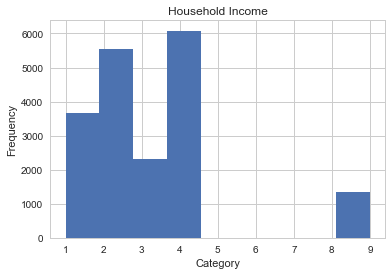

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dataset["INCOM_R"], bins=9)
plt.title("Household Income")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

In [53]:
single_family = dataset[dataset["RESTY"] == 1]
multi_family = dataset[dataset["RESTY"] == 2]
multi_family

,SAMPN,RESTY,HHSIZ,HHLIC,INCOM_R,HHVEH_R
4,3000157,2,1,0,1,0
6,3000250,2,1,1,2,1
8,3000296,2,1,0,1,0
9,3000403,2,1,1,1,0
13,3000486,2,2,2,4,2
14,3000490,2,1,0,2,0
18,3000598,2,1,0,1,0
20,3000616,2,1,1,2,1
23,3000686,2,1,0,1,0
26,3000711,2,1,0,1,0


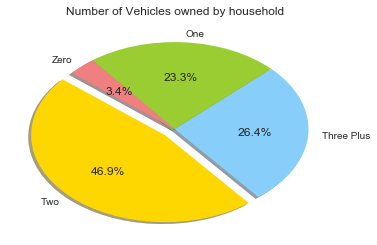

In [57]:
single_family_veh = single_family.HHVEH_R.value_counts()
single_family_veh
labels = ['Two', 'Three Plus', 'One', 'Zero']
colors = ['gold', 'lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0, 0)  # explode 1st slice
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.pie(single_family_veh, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Vehicles owned by Single Family Households")
plt.show()